In [19]:
import torch
import torchvision
from lucent.optvis import render, param, transform, objectives

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
layer='Mixed_7b'
neuron = 35

https://github.com/greentfrapp/lucent 

https://colab.research.google.com/github/greentfrapp/lucent-notebooks/blob/master/notebooks/diversity.ipynb#scrollTo=ZmmS4duOoU65

https://colab.research.google.com/github/greentfrapp/lucent-notebooks/blob/master/notebooks/tutorial.ipynb#scrollTo=1W_gbtglap04

Using cache found in /home/laura/.cache/torch/hub/pytorch_vision_v0.9.0
100%|██████████| 512/512 [00:20<00:00, 24.96it/s]


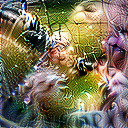

[array([[[[0.3531371 , 0.31708568, 0.4420404 ],
          [0.35832378, 0.34829134, 0.38561326],
          [0.54496   , 0.575417  , 0.65508956],
          ...,
          [0.66512257, 0.4670327 , 0.4816162 ],
          [0.73320043, 0.5943547 , 0.6195799 ],
          [0.21935157, 0.24844816, 0.34802586]],
 
         [[0.7384625 , 0.8146374 , 0.807553  ],
          [0.7639319 , 0.81457263, 0.6374742 ],
          [0.5809101 , 0.58140486, 0.65451616],
          ...,
          [0.45347562, 0.30259815, 0.38168886],
          [0.5758461 , 0.46007636, 0.4820546 ],
          [0.6573492 , 0.6217404 , 0.68431103]],
 
         [[0.2842082 , 0.3553898 , 0.4273873 ],
          [0.33789727, 0.34976503, 0.364216  ],
          [0.26618233, 0.3822269 , 0.6752845 ],
          ...,
          [0.39082184, 0.31071213, 0.47376505],
          [0.51385   , 0.39596668, 0.4365747 ],
          [0.5635535 , 0.4031075 , 0.5106942 ]],
 
         ...,
 
         [[0.18980101, 0.39237276, 0.44288936],
          [0.11991

In [12]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained=True)
model.to(device).eval()

render.render_vis(model, f'{layer}:{neuron}')

100%|██████████| 512/512 [00:19<00:00, 25.78it/s]


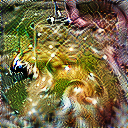

In [15]:
_ = render.render_vis(model, f'{layer}:{neuron}')

100%|██████████| 512/512 [00:24<00:00, 20.49it/s]



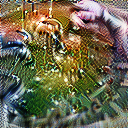
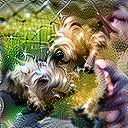
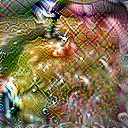
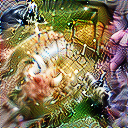
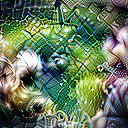
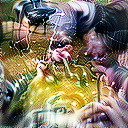

In [62]:
batch_param_f = lambda: param.image(128, batch=6, decorrelate=True)
obj = objectives.channel(layer, neuron)
_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:44<00:00, 11.55it/s]



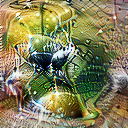
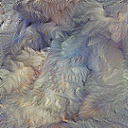
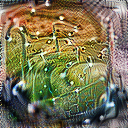
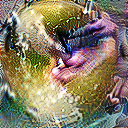
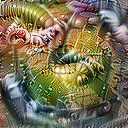
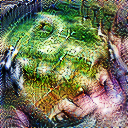

In [61]:
batch_param_f = lambda: param.image(128, batch=6)

obj = objectives.channel(layer, neuron) - 1e0 * objectives.diversity(layer)

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:44<00:00, 11.44it/s]



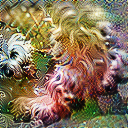
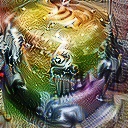
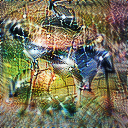
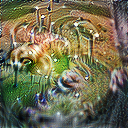
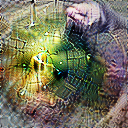
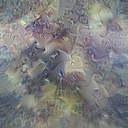

In [66]:
batch_param_f = lambda: param.image(128, batch=6)

obj = objectives.channel(layer, neuron) - 1 * objectives.diversity(layer)

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:44<00:00, 11.42it/s]



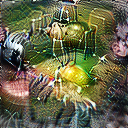
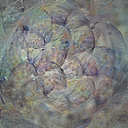
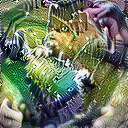
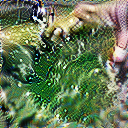
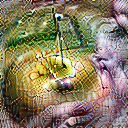
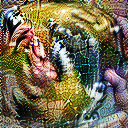

In [71]:
batch_param_f = lambda: param.image(128, batch=6)

obj = objectives.channel(layer, neuron) - 0.5 * objectives.diversity(layer)

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

In [53]:
?render.render_vis

100%|██████████| 512/512 [00:42<00:00, 12.09it/s]



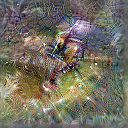
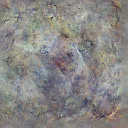
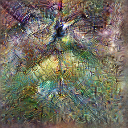
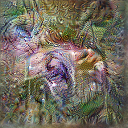
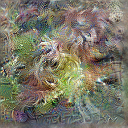
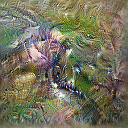

In [73]:
param_f = lambda: param.image(128, fft=True, batch=6)
obj = objectives.channel(layer, neuron) - 1 * objectives.diversity(layer)
_ = render.render_vis(model, obj, param_f, transforms=[], show_inline=True)

100%|██████████| 512/512 [00:45<00:00, 11.30it/s]



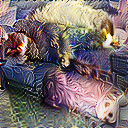
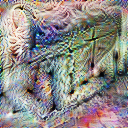
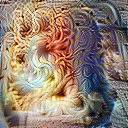
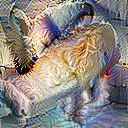
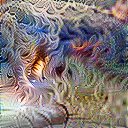
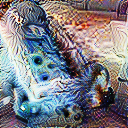

In [72]:
batch_param_f = lambda: param.image(128, batch=6)

obj = objectives.channel(layer, 57) - 0.5 * objectives.diversity(layer)

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)

100%|██████████| 512/512 [00:46<00:00, 11.10it/s]



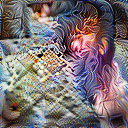
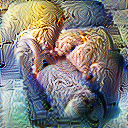
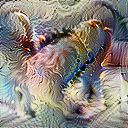
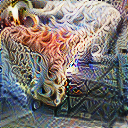
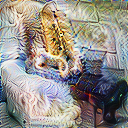
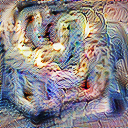

In [74]:
batch_param_f = lambda: param.image(128, batch=6)

obj = objectives.channel(layer, 57) - 1 * objectives.diversity(layer)

_ = render.render_vis(model, obj, batch_param_f, show_inline=True)